# Gauss Bump

In [1]:
import sympy as sympy
from sympy import Matrix
from sympy.utilities.lambdify import lambdastr

sympy.init_printing()

In [2]:
# domain variables (x, y) in (0, 1)x(0, 1)
# ----------------------------------------
x, y = sympy.symbols('x y')

# problem-specific parameters
# ---------------------------
# offset of peak from (0, 0)
mu_x, mu_y = sympy.symbols('mu_x mu_y')
# "width" of peak
sigma_x, sigma_y = sympy.symbols('sigma_x sigma_y')

# exact solution
# --------------
kick = sympy.exp( -sigma_x * (x-mu_x)**2 - sigma_y * (y-mu_y)**2 )
u = x*(x-1)*y*(y-1)*kick

# laplace u
laplace = (sympy.diff(u, y, y) + sympy.diff(u, x, x)).simplify()

# gradient u = (u_x, u_y)
u_x = sympy.diff(u, x)
u_y = sympy.diff(u, y)

# printing the setup
u

# Expression to Code

We use `sympy`'s built-in `lambdastr` function to convert (complicated) symbolic expressions to python implementations in string format.

## Gradient $\nabla u$

In [10]:
u_x.simplify()

In [11]:
lambdastr((x, y), u_x.simplify())

'lambda x,y: (y*(y - 1)*(2*sigma_x*x*(mu_x - x)*(x - 1) + 2*x - 1)*math.exp(-sigma_x*(-mu_x + x)**2 - sigma_y*(-mu_y + y)**2))'

In [12]:
lambdastr((x, y), u_y.simplify())

'lambda x,y: (x*(x - 1)*(2*sigma_y*y*(mu_y - y)*(y - 1) + 2*y - 1)*math.exp(-sigma_x*(-mu_x + x)**2 - sigma_y*(-mu_y + y)**2))'

## Laplace $\Delta u$

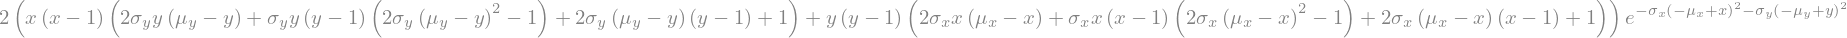

In [3]:
laplace.simplify()

In [4]:
lambdastr((x, y), laplace)

'lambda x,y: (2*(x*(x - 1)*(2*sigma_y*y*(mu_y - y) + sigma_y*y*(y - 1)*(2*sigma_y*(mu_y - y)**2 - 1) + 2*sigma_y*(mu_y - y)*(y - 1) + 1) + y*(y - 1)*(2*sigma_x*x*(mu_x - x) + sigma_x*x*(x - 1)*(2*sigma_x*(mu_x - x)**2 - 1) + 2*sigma_x*(mu_x - x)*(x - 1) + 1))*math.exp(-sigma_x*(-mu_x + x)**2 - sigma_y*(-mu_y + y)**2))'

## Solution $u(x, y)$

In [5]:
u

In [6]:
lambdastr((x, y), u)

'lambda x,y: (x*y*(x - 1)*(y - 1)*math.exp(-sigma_x*(-mu_x + x)**2 - sigma_y*(-mu_y + y)**2))'

## $|\nabla u|^2 (x, y)$

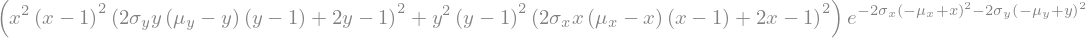

In [7]:
gradient_u = Matrix([u]).jacobian([x, y])
gradient_u_squared = gradient_u.dot(gradient_u).simplify()
gradient_u_squared.simplify()

In [8]:
lambdastr((x, y), gradient_u_squared)

'lambda x,y: ((x**2*(x - 1)**2*(2*sigma_y*y*(mu_y - y)*(y - 1) + 2*y - 1)**2 + y**2*(y - 1)**2*(2*sigma_x*x*(mu_x - x)*(x - 1) + 2*x - 1)**2)*math.exp(-2*sigma_x*(-mu_x + x)**2 - 2*sigma_y*(-mu_y + y)**2))'

## Plot $u(x, y)$

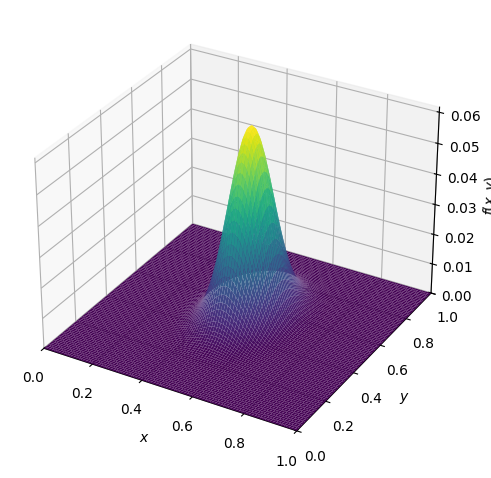

In [4]:
# plotting exact solution for some specific values
u_specific = u.subs([
    [mu_x, 37./73],
    [mu_y, 41./73.],
    [sigma_x, 100.],
    [sigma_y, 40.]
])
sympy.plotting.plot3d(u_specific, (x, 0, 1), (y, 0, 1))

# Numerical

In [5]:
from scipy.integrate import simpson
import numpy as np

In [8]:
# turning analytical function into a python callable with specific choices of the parameters

func = sympy.lambdify((x, y), gradient_u_squared.subs([
    [mu_x, 37./73],
    [mu_y, 41./73.],
    [sigma_x, 100.],
    [sigma_y, 40.]
]), modules="numpy")

In [9]:
values = []
n_points = []
for n in [20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]:

    x_samples = np.linspace(0., 1., n, dtype=np.float128)
    y_samples = np.linspace(0., 1., n, dtype=np.float128)
    
    z = func(x_samples[:,None], y_samples)
    
    values.append(simpson(simpson(z, x=y_samples), x=x_samples))
    n_points.append(n**2)

In [117]:
values

[0.013285622102827932587,
 0.013055986833573332965,
 0.013055985158409849911,
 0.013055985166633283954,
 0.013055985166934955806,
 0.013055985166949389544,
 0.013055985166950180682,
 0.01305598516695022324,
 0.013055985166950227467,
 0.01305598516695022655]